<a href="https://colab.research.google.com/github/osh9149/2022_DataScience/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 머신러닝(Machine Learning) 모델 적용

## 03 분류 모델 적용

#### 1 이진 분류 모델(로지스틱)

##### 가. 입력 변수가 1개(시험->합/부)

In [5]:
# 데이터: x(입력), y(정답)
import numpy as np               # 배열 연산 라이브러리
x = np.array([[74],[81],[94],[68],[64],[70],[83],[94],[71],[74]]) #시험점수
y = np.array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1])  # 1: 합격, 0: 불합격

# 모델 선정하기
from sklearn.linear_model import LogisticRegression  #로지스틱회귀 라이브러리
log_reg = LogisticRegression(solver='lbfgs')  # 모델 생성

# 학습하기
model = log_reg.fit(x, y)

In [6]:
# 학습 결과(w, b) 확인
w = model.coef_
b = model.intercept_
print("w=", w, "b=", b)

w= [[1.02741042]] b= [-74.30001409]


In [7]:
# 로지스틱 회귀 모델
def H(x):
  return 1/(1+np.exp(-(x*w+b)))

# 훈련데이터(x) 에 대한 모델의 예측
y_pred = np.where(H(x) > 0.5 , 1,0)  # 0.5보다 크면 1 아니면 0

# 모델 그래프 데이터 준비
x_in = np.arange(x.min(),x.max(),0.5)
Hx = H(x_in).reshape(-1,1)

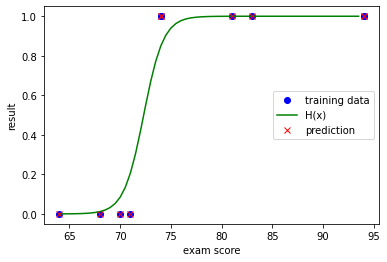

In [8]:
# 그래프로 모델과 실제 데이터 비교하기
import matplotlib.pyplot as plt               # 데이터 시각화
plt.plot(x, y, 'bo', label='training data')       # 훈련 데이터셋
plt.plot(x_in, Hx, 'g', label='H(x)')         # H(x)
plt.plot(x, y_pred,'rx', label='prediction')  # 회귀모델의 예측
plt.xlabel("exam score"), plt.ylabel("result")
plt.legend(loc='right')
plt.show()

In [9]:
# 예측하기
x_new = np.array([[72],[73]])
print("H(x)  =     ", H(x_new))
print("예측 결과 = ", model.predict(x_new))      # 새로운 입력 데이터에 대한 출력 데이터 예측

H(x)  =      [[0.41910132]
 [0.66839765]]
예측 결과 =  [0 1]


In [10]:
print(np.shape(x), np.shape(w))

(10, 1) (1, 1)


##### 나. 입력 변수가 2개(시험,면접->합/부)

In [11]:
#배열 처리 및 수치 계산 라이브러리 numpy
import numpy as np     

#입력 데이터: 입력 특성 2개, 데이터셋 10개
X = np.array([[74, 68 ],  # 지원자1
     [81, 83 ],  # 지원자2
     [78, 80 ],  # 지원자3
     [80, 71 ],  # 지원자4
     [75, 75 ],  # 지원자5
     [70, 70 ],  # 지원자6
     [83, 77 ],  # 지원자7
     [74, 86 ],  # 지원자8
     [71, 76 ],  # 지원자9
     [74, 64 ]])  # 지원자10

y = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0]) # y(1)~y(10)

#feature_names = ['시험', '면접']
#target_name = '결과'

w= [[0.88565688 0.40926277]] b= [-98.2537524]
(10, 2) (10,)


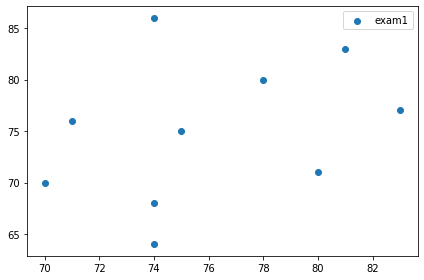

In [12]:
#라이브러리 
import numpy as np               # 연산
import matplotlib.pyplot as plt  # 데이터 시각화

# 모델 선정하기
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver='lbfgs')  # 추정기(로지스틱 회귀)

# 학습하기
model = log_reg.fit(X, y)

# 학습 결과(w, b) 확인
W = model.coef_
b = model.intercept_
print("w=", W, "b=", b)

def H(x):
  return 1/(1+np.exp(-(X*W+b)))

pred = np.where(H(X) > 0.5 , 1,0)
#x_in = np.arange(X.min(),X.max(),0.5)
#H = H(x_in)
#print(x_in.shape, H.shape)

# 그래프로 모델과 실제 데이터 비교하기
#plt.plot(X, y, 'bo', label='real data')      # 훈련 데이터셋
#plt.plot(x_in, H, 'g', label='H(x)')             # H(x)
#plt.plot(X, pred,'rx', label='prediction')   # 회귀모델의 예측
#plt.xlabel("exam score"), plt.ylabel("interview")
#plt.legend()
#plt.show()


print(np.shape(X), np.shape(y))
plt.scatter(X[:,0],X[:,1], marker='o', label = 'exam1')
#plt.scatter(X[:,1],y, marker='s', label = 'exam2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# 예측하기
x_new = np.array([[74, 80],[80, 74]])
#print(model.predict(x_new))      # 새로운 입력 데이터에 대한 출력 데이터 예측

### [참고] 이진 분류 모델(유방암)

#### 가 데이터 수집

 * 데이터명 : 위스콘신대학교 유방암 진단 데이터(Wisconsin Diagnostic Breast Cancer)
  * 캐글 https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
   * UCI https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
 * 레코드(열, 케이스, 인스턴스) 수: 569개
 * 속성(컬럼, 특성): 32개(ID, 진단결과, 30개의 실측값)
 * 클래스 분포 :  악성(Malignant) 212개, 양성(Benign) 357개

#### 나 전처리
* scikit-learn에서 제공하는 데이터셋을 이용
* 데이터 전처리가 거의 필요없는 데이터셋

In [13]:
from sklearn.datasets import load_breast_cancer  #데이터셋 가져오기
cancer = load_breast_cancer()   # 데이터셋 적재하기
print(cancer.DESCR)             # 데이터셋에 관한 설명
print(cancer.data)              # 입력 특성(feature)
print(cancer.target)            # 출력(label)
print(cancer.feature_names)     # 입력 특성의 이름
print(cancer.target_names)      # 출력의 이름

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

  * 참고: UCI 머신러닝저장소에서 데이터셋을 직접 가져오기

In [14]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# 온라인에서 바로 데이터셋을 다운로드할 수 없으면
# 다음과 같이 로컬 경로에서 데이터셋을 적재한다.
# df = pd.read_csv('wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


 * 넘파이 데이터를 판다스 데이터프레임으로 변환(데이터셋을 쉽게 분석하기 위하여)

In [17]:
# 넘파이 데이터를 판다스 데이터프레임으로 변환하여 데이터셋 분석하기
import pandas as pd   # 행렬 계산 라이브러리
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)  # 데이터 객체 생성
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
print(cancer.data.shape)

(569, 30)


* 데이터 시각화를 통한 데이터 분석
  * 3차원 이상의 데이터셋은 seaborn 패키지의 pareplot으로 시각화한다.

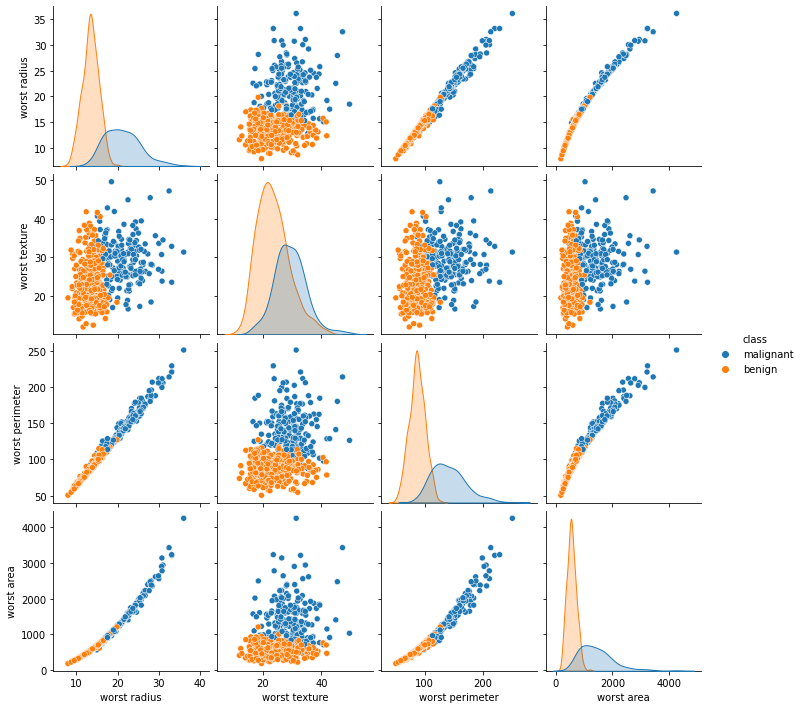

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(vars=["worst radius", "worst texture", "worst perimeter", "worst area"], 
             hue="class", data=df)
plt.show()

 * [출처: 파이썬 라이브러리를 활용한 머신러닝](https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-3-%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8/#linear-multi)

#### 다 학습하기

* 학습 준비

In [20]:
from sklearn.datasets import load_breast_cancer       # 유방암 데이터셋
from sklearn.linear_model import LogisticRegression   # 로지스틱 회귀 모델 라이브러리
from sklearn.model_selection import train_test_split  # 데이터셋 분리(훈련용/테스트용)
from sklearn.preprocessing import StandardScaler      # 특성 스케일링
from sklearn.pipeline import make_pipeline            # 파이프라인 만들기

# 유방암 데이터셋 불러오기
cancer = load_breast_cancer()

# 데이터셋 분리(훈련 80%, 테스트 20%)
X_train , X_test, y_train , y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# 파이프라인:순서(특성스케일링>로지스틱회귀)대로 변환기+추정기 수행하기
pipe_lr = make_pipeline(StandardScaler(),     # 변환기(특성 스케일링)
                        LogisticRegression(solver='lbfgs')) # 추정기(로지스틱 회귀)


* 학습하기

In [21]:
# 학습하기
model_lr = pipe_lr.fit(X_train, y_train)

# 모델의 정확도 출력
print("훈련 세트 정확도  : %.4f" %model_lr.score(X_train, y_train))

훈련 세트 정확도  : 0.9868


#### 라 모델 검증 및 성능 향상

* 계층적 k-fold 교차 검증(분류 모델에 주로 사용)

In [22]:
from sklearn.model_selection import cross_val_score  # 교차 검증 라이브러리
from sklearn.model_selection import StratifiedKFold  # 계층적 K폴드 교차 검증

# 모델 복잡도 제어 파라미터 조정(튜닝)
pipe_lr.set_params(logisticregression__C = 0.4 , logisticregression__max_iter=1000)
model_lr = pipe_lr.fit(X_train, y_train)

# 계층적 K폴드 교차 검증 – 폴드수:10
cv_val = StratifiedKFold(10, shuffle=True, random_state=42)
score = cross_val_score(model_lr, X_train, y_train, cv=cv_val)

# 결과 출력하기
for k in range(len(score)):
 print("단계", "%d : %.4f"%(k+1,score[k]))
print("평균: %.4f (표준편차=%.4f)" %(score.mean(),score.std()))

단계 1 : 1.0000
단계 2 : 0.9565
단계 3 : 0.9783
단계 4 : 0.9565
단계 5 : 0.9783
단계 6 : 0.9778
단계 7 : 1.0000
단계 8 : 0.9778
단계 9 : 0.9556
단계 10 : 0.9778
평균: 0.9758 (표준편차=0.0153)


 * [참고] k-fold 교차 검증(회귀 모델에 주로 사용)

In [23]:
from sklearn.model_selection import cross_val_score  # 교차 검증 라이브러리
from sklearn.model_selection import KFold            # K폴드 교차 검증

# K폴드 교차 검증
cv_val = KFold(10, shuffle=True, random_state=42)
score = cross_val_score(pipe_lr, X_train, y_train, cv=cv_val)

# 결과 출력하기
for k in range(len(score)):
 print("Fold ", "%d : %.4f"%(k+1,score[k]))
print("평균: %.4f (표준편차=%.4f)" %(score.mean(),score.std()))

Fold  1 : 0.9565
Fold  2 : 0.9565
Fold  3 : 0.9783
Fold  4 : 0.9783
Fold  5 : 1.0000
Fold  6 : 1.0000
Fold  7 : 0.9556
Fold  8 : 0.9556
Fold  9 : 0.9778
Fold  10 : 1.0000
평균: 0.9758 (표준편차=0.0183)


* 모델 성능 향상을 위한 하이퍼파라미터 확인

In [24]:
# 제어할 수 있는 하이퍼파라미터 확인
print(pipe_lr.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])


* 훈련 데이터셋에서 검증 데이터셋 추출

In [25]:
# 훈련 데이터셋에서 검증용 데이터셋을 분리(훈련 80%, 검증 20%)
X_trainV , X_testV, y_trainV , y_testV = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

* 모델 성능 향상을 위한 C값 튜닝

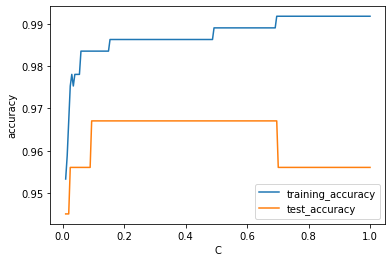

In [26]:
import numpy as np         # 행열 연산 라이브러리
import matplotlib.pyplot as plt

# 정확도 저장 변수
training_accuracy = []
test_accuracy = []

# 모델 복잡도 제어 계수
c_range = np.linspace(0.01,1,200)  # 0.01~100 에서 균일한 간격으로 200개

# C값 변화에 따른 모델 성능 검증 
for C_in in c_range:
    # 모델 복잡도 제어 파라미터 조정(튜닝)
    pipe_lr.set_params(logisticregression__C = C_in , 
                       logisticregression__max_iter=1000) 
    # 모델의 훈련 세트 정확도 저장
    result = pipe_lr.fit(X_trainV, y_trainV)      
    training_accuracy.append(result.score(X_trainV, y_trainV))
    # 모델의 일반화 정확도 저장
    test_accuracy.append(result.score(X_testV, y_testV))

# 결과 그래프 그리기
plt.plot(c_range, training_accuracy, label="training_accuracy")
plt.plot(c_range, test_accuracy, label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()
plt.show()

* 분류 성능 보고서
  * 1 : 암에 걸린 표본(양성, positive, benign), 
  * 0 : 암에 걸리지 않은 표본(음성, negative, malignant)
  * accuracy(정확도) : 전체 표본 중 정확하게 예측한 표본의 비율 = (TP+TN)/전체예측수
  * precision(정밀도): 양성(음성)이라고 예측한 표본 중 실제로 양성(음성)인 표본의 비율 = TP/(TP+FP)
  * recall(재현율)   : 실제로 양성(음성)인 표본 중 양성(음성)이라고 예측한 표본의 비율 = TP/(TP+FN)
  * f1-score(F점수)  : 정밀도와 재현율의 조화평균 = 2(precision*recall)/(precision+recall)
  * support          : 표본의 수
  * macro            : 단순 평균
  * weighted         : 각 클래스에 속하는 표본의 갯수로 가중평균

  * 오차 행렬(confusion matrix)
    * TP(True Positive)  : 양성을 양성이라고 정확하게 예측한 표본 수
    * TN(True Negative)  : 음성을 음성이라고 정확하게 예측한 표본 수
    * FP(False Positive) : 양성을 음성이라고 잘못 예측한 표본 수 
    * FN(False Negative) : 음성을 양성이라고 잘못 예측한 표본 수 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.96      0.98      0.97        55

    accuracy                           0.97        91
   macro avg       0.97      0.96      0.97        91
weighted avg       0.97      0.97      0.97        91



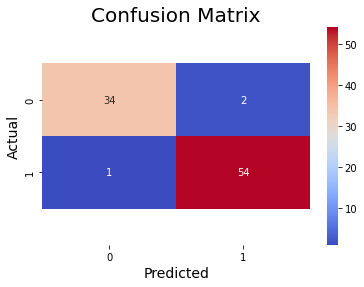

In [27]:
from sklearn.metrics import classification_report # 분류기 성능지표 라이브러리
from sklearn.metrics import confusion_matrix      # 오차행렬 라이브러리 

# 검증 모델 파라미터 설정
pipe_lr.set_params(logisticregression__C = 0.4 , logisticregression__max_iter=1000)

# 검증 모델 훈련
result = pipe_lr.fit(X_trainV, y_trainV)

# 분류기 성능지표 데이터 준비
y_true = y_testV                   # 실제값
y_pred = result.predict(X_testV)   # 예측값

# 분류 성능 보고서 확인
print(classification_report(y_true, y_pred))

# 그래프로 확인하기
cm = confusion_matrix(y_true,y_pred)    # 분류결과표 객체 생성
pic = sns.heatmap(cm, cmap="coolwarm", annot = True)  # 그래프 생성
bottom, top = pic.get_ylim()            # 숫자 잘림 현상 방지
pic.set_ylim(bottom + 0.5, top - 0.5)   # 숫자 잘림 현상 방지
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show(pic)                           # 그래프 보이기

  => c=0.4 로 교차 검증으로 다시 한 번 확인하고 최종 모델 결정

* 최종 모델

In [28]:
# 최종 모델 파이프라인
pipe_lr_final = make_pipeline(StandardScaler(),     # 변환기(특성 스케일링)
                LogisticRegression(solver='lbfgs',C = 0.4,max_iter=1000))  # 추정기(로지스틱 회귀)

# 학습된 최종 모델
model_final = pipe_lr_final.fit(X_train, y_train)

# 최종 모델 테스트
print("훈련 세트 점수  : %.4f" %model_final.score(X_train, y_train))
print("테스트 세트 점수: %.4f" %model_final.score(X_test, y_test))

훈련 세트 점수  : 0.9868
테스트 세트 점수: 0.9825


* 최종 모델 성능 확인

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



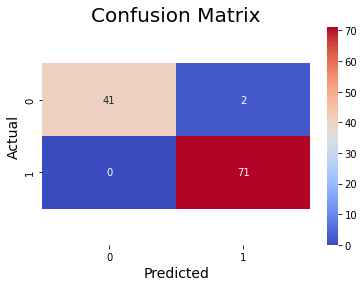

In [29]:
# 분류기 성능지표 데이터 준비
y_true = y_test                              # 실제값
y_pred = model_final.predict(X_test)         # 예측값

# 분류기 성능 출력하기
print(classification_report(y_true, y_pred))

# 오차행렬을 그래프로 출력하기
cm = confusion_matrix(y_true,y_pred)    # 분류결과표 객체 생성
pic = sns.heatmap(cm, cmap="coolwarm", annot = True)  # 그래프 생성
bottom, top = pic.get_ylim()            # 숫자 잘림 현상 방지
pic.set_ylim(bottom + 0.5, top - 0.5)   # 숫자 잘림 현상 방지
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show(pic)                           # 그래프 보이기

#### 마 예측하기

In [32]:
#model_final.predict(X_new)

### 2 다중 분류 모델(Iris, 소프트맥스)

[참고 사이트](https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983)

In [33]:
# 데이터 가져오기
from  sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR)                         # 데이터셋 설명
print("특성(x):\n", iris.feature_names)   # 특성 이름
print("클래스(y):\n", iris.target_names)  # 클래스 이름
x = iris.data                             # 데이터(x)
y = iris.target                           # 레이블(y)
print("데이터 수:\n x-", x.shape, "y-", y.shape) # 데이터 수

특성(x):
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
클래스(y):
 ['setosa' 'versicolor' 'virginica']
데이터 수:
 x- (150, 4) y- (150,)


In [34]:
# 데이터 분석 - 표
import pandas as pd         # 데이터 분석 라이브러리
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


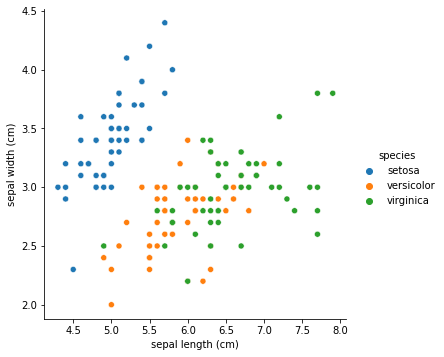

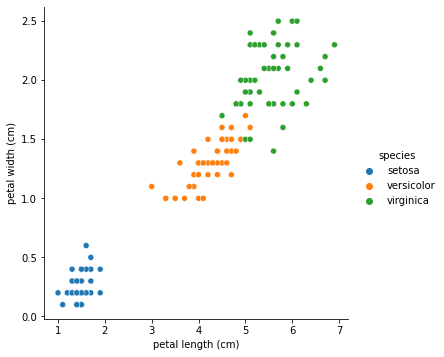

In [35]:
# 데이터 분석 - 그래프
import matplotlib.pyplot as plt    # 그래프 라이브러리
import seaborn as sns              # matplot를 확장한 그래프 라이브러리
sns.pairplot(df, x_vars=["sepal length (cm)"], 
             y_vars=["sepal width (cm)"], hue="species", height = 5)
sns.pairplot(df, x_vars=["petal length (cm)"], 
             y_vars=["petal width (cm)"], hue="species", height = 5)
plt.show()

In [36]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x, y, 
                                test_size = 0.3, random_state = 42)

# 모델 선정
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', C=10, 
           solver='lbfgs', max_iter=1000, random_state = 42)

# 훈련
model.fit(x_train,y_train)

# 훈련 결과
import numpy as np          # 수학 연산 라이브러리
W = model.coef_
b = model.intercept_
print("W= \n", np.round(W,2), "\nb= \n", np.round(b,2))

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial',
                   random_state=42)

In [37]:
# 분류 과정을 살펴보기 위한 클래스별 데이터 만들기
x_set = [[5.0, 2.5, 2.0, 1.0]]  # setosa
x_ver = [[6.0, 3.0, 4.5, 1.5]]  # versicolor
x_vir = [[6.0, 3.0, 5.0, 2.0]]  # virginica

# 로지스틱 회귀 모델
def H(X):
  Hx = np.matmul(X,W.T)+b  # Hx = WX + b
  return 1/(1+np.exp(-Hx))

# (1) wx + b 출력 
print("(1) y = wx + b ")
print("WX+b setosa     : ",np.matmul(x_set,W.T)+b )
print("WX+b versicolor : ",np.matmul(x_ver,W.T)+b )
print("WX+b virginica  : ",np.matmul(x_vir,W.T)+b )

# (2) 소프트맥스 추정 확률
print("(2) 소프트맥스 추정 확률 s(y)")
print("setosa    : ", np.round(model.predict_proba(x_set),2))
print("versicolor: ", np.round(model.predict_proba(x_ver),2))
print("virginica : ", np.round(model.predict_proba(x_vir),2))

# (3) One-hot-encoding 결과 
print("(3) One-hot-encoding 결과")
print("입력: setosa     > 추정:", model.predict(x_set))
print("입력: versicolor > 추정:", model.predict(x_ver))
print("입력: virginica  > 추정:", model.predict(x_vir))

# 모델 테스트
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print("정확도= %.4f" %accuracy_score(y_test, y_pred))

W= 
 [[-0.38  1.95 -3.98 -1.88]
 [ 0.93  0.07 -0.41 -1.88]
 [-0.56 -2.01  4.39  3.76]] 
b= 
 [ 12.93   2.37 -15.3 ]
(1) y = wx + b 
WX+b setosa     :  [[  6.06337357   4.5143735  -10.57774707]]
WX+b versicolor :  [[-4.23717262  3.52850238  0.70867024]]
WX+b virginica  :  [[-7.16943176  2.38663958  4.78279218]]
(2) 소프트맥스 추정 확률 s(y)
setosa    :  [[0.82 0.18 0.  ]]
versicolor:  [[0.   0.94 0.06]]
virginica :  [[0.   0.08 0.92]]
(3) One-hot-encoding 결과
입력: setosa     > 추정: [0]
입력: versicolor > 추정: [1]
입력: virginica  > 추정: [2]
정확도= 1.0000


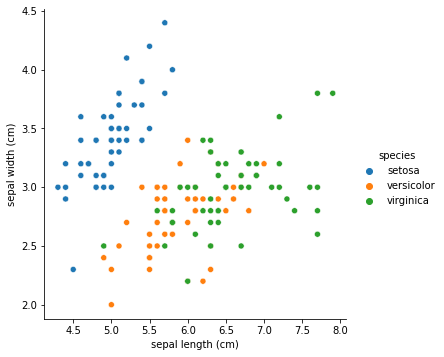

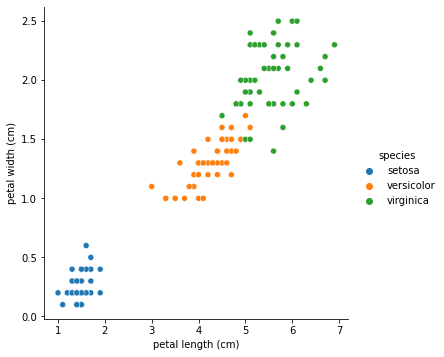

In [38]:
# 데이터 분석 - 그래프
import matplotlib.pyplot as plt    # 그래프 라이브러리
import seaborn as sns              # matplot를 확장한 그래프 라이브러리
sns.pairplot(df, x_vars=["sepal length (cm)"], 
             y_vars=["sepal width (cm)"], hue="species", height = 5)
sns.pairplot(df, x_vars=["petal length (cm)"], 
             y_vars=["petal width (cm)"], hue="species", height = 5)
plt.show()

##### [참고] 결정 경계 그래프
[참고 사이트](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

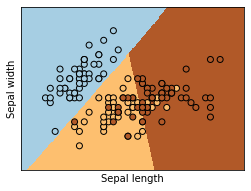

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

##### [참고] 3종의 분류기 비교

In [ ]:
from  sklearn import  datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 42)

from sklearn import tree
dtree_clf = tree.DecisionTreeClassifier()
dtree_clf.fit(x_train,y_train)
#y_pred = dtree_clf.predict(x_test)

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
sgd_clf = SGDClassifier(max_iter=1000, random_state= 42)
rndf_clf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state = 42)
smax_clf = LogisticRegression(multi_class='multinomial', 
                                 solver='lbfgs', C=10, max_iter=1000, random_state = 42)

sgd_clf.fit(x_train,y_train)
rndf_clf.fit(x_train,y_train)
smax_clf.fit(x_train,y_train)


from sklearn.metrics import accuracy_score
print("DecisionTree 정확도", accuracy_score(y_test,dtree_clf.predict(x_test)))
print("SGDClassifier 정확도", accuracy_score(y_test,sgd_clf.predict(x_test)))
print("RandomForest 정확도", accuracy_score(y_test,rndf_clf.predict(x_test)))
print("SoftMax 정확도", accuracy_score(y_test,smax_clf.predict(x_test)))


DecisionTree 정확도 1.0
SGDClassifier 정확도 0.8
RandomForest 정확도 1.0
SoftMax 정확도 1.0
